<a href="https://colab.research.google.com/github/Yunho-seo/education_center5/blob/main/12_numpy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Broadcasting

import numpy as np

x = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])  # 4x3 행렬
y = np.array([[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]])
print(x + y)  # 요소 연산

y1 = np.array([0, 1, 2])  # 1x3 행렬
print(x + y1) # 4x3 + 1x3 = 차수가 맞지 않음 => 1x3을 4x3 행렬로 늘린다 (브로드캐스팅)
# [0, 1, 2]
# [0, 1, 2]
# [0, 1, 2]
# [0, 1, 2]

x1 = np.array([[0], [10], [20], [30]])  # 4x1 행렬 => 4x3으로 늘린다
# 1x3 => 4x3
print(x1 + y1)  # 결과는 4x3 행렬로 나와야 한다.

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [10]:
names = np.array(['Seoul', 'Daejeon', 'chungju', 'seoul', 'chungju',
                  'Daejeon', 'Daejeon'])
data = np.random.randn(7, 4)  # 7x4
print(data)
print(names == 'Seoul')  # 7x4 행렬 중, 첫번째 행만 선택하겠다는 의미이다 
print(data[names == 'Seoul'])  # boolean indexing

print(data[names == 'Seoul', 2:])
print(data[names == 'Seoul', 3])

print(names != 'Seoul')     # 대입 연산자 부정
print(~(names == 'Seoul'))  # 논리 연산자 부정
mask = (names == 'Seoul') | (names == 'chungju')
print(mask)
print(data[mask])

[[-0.61052833 -0.10911422  0.27968433 -0.86693258]
 [ 1.17272159  0.5528403   0.90503407 -0.09201757]
 [ 0.99468678  0.43043791 -0.63975215 -0.83449753]
 [ 1.62114926 -0.0085548  -0.55725455 -1.28263178]
 [ 0.234001   -1.26424238  0.83561771 -1.07034762]
 [-0.70049718  0.42687576  1.42871563  1.24372267]
 [ 0.76444762  1.31065327  1.09854538  1.25652718]]
[ True False False False False False False]
[[-0.61052833 -0.10911422  0.27968433 -0.86693258]]
[[ 0.27968433 -0.86693258]]
[-0.86693258]
[False  True  True  True  True  True  True]
[False  True  True  True  True  True  True]
[ True False  True False  True False False]
[[-0.61052833 -0.10911422  0.27968433 -0.86693258]
 [ 0.99468678  0.43043791 -0.63975215 -0.83449753]
 [ 0.234001   -1.26424238  0.83561771 -1.07034762]]


In [11]:
# 문제
# 첫번째 열이 0.5보다 큰 행을 선택하기

print(data[:, 0] >= 0.5)
print(data[data[:, 0] >= 0.5])

[False  True  True  True False False  True]
[[ 1.17272159  0.5528403   0.90503407 -0.09201757]
 [ 0.99468678  0.43043791 -0.63975215 -0.83449753]
 [ 1.62114926 -0.0085548  -0.55725455 -1.28263178]
 [ 0.76444762  1.31065327  1.09854538  1.25652718]]


In [13]:
# 삼항 연산자 (python core에서 3항 연산자)
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

print(zip(xarr, yarr, cond))  # zip 객체 출력 불가
print(list(zip(xarr, yarr, cond)))
# ndarray는 파이썬 코어 함수에 호환이 되도록 작성된다.
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]  # zip은 파이썬 코어 함수이지만 호환이 된다.
print("result = ", result)

result = np.where(cond, xarr, yarr)  # 반복문이 없음
print(result)

[(1.1, 2.1, True), (1.2, 2.2, False), (1.3, 2.3, True), (1.4, 2.4, True), (1.5, 2.5, False)]
result =  [1.1, 2.2, 1.3, 1.4, 2.5]
[1.1 2.2 1.3 1.4 2.5]


In [16]:
# 문제
arr = np.random.randn(4, 4)
print(arr)
# 다음 배열에 대해 요소값이 0보다 크면 2, 작으면 -2로 표현
result = np.where(arr > 0, 2, -2)  # 다차원에 대해서도 요소별로 판단한다. (모양을 유지한 채로 판단)
print(result)

# 요소값이 0보다 크면 2, 작으면 배열에 있는 값으로 표현
result = np.where(arr > 0, 2, arr)
print(result)

# 파이썬 코어(core)하고는 다르다 (for.if, vectorization 벡터화 연산)

[[-0.31258323  0.38877433  1.48397008 -1.0957174 ]
 [ 0.33676123  0.31764432  0.61142154  0.47783471]
 [-0.51427857  1.91824913  1.04517057 -1.63609888]
 [-1.10614862 -0.33530919 -0.89852475  0.96778288]]
[[-2  2  2 -2]
 [ 2  2  2  2]
 [-2  2  2 -2]
 [-2 -2 -2  2]]
[[-0.31258323  2.          2.         -1.0957174 ]
 [ 2.          2.          2.          2.        ]
 [-0.51427857  2.          2.         -1.63609888]
 [-1.10614862 -0.33530919 -0.89852475  2.        ]]


In [18]:
np.where([[True, False], [True, True]],
         [[1, 2], [3, 4]],
        [[9, 8], [7, 6]])

array([[1, 8],
       [3, 4]])

In [21]:
# 브로드캐스팅 , for문이 없고 boolean indexing + vectorization (항상 생각)
x, y = np.ogrid[:3, :4]  # meshgrid 그물망 (12개가 만들어짐)
print(x) [[0], [1], [2]]
print(y) [[0, 1, 2, 3]]
# 브로드캐스팅 3x4
np.where(x < y, x, 10+y)

[[0]
 [1]
 [2]]
[[0 1 2 3]]


array([[10,  0,  0,  0],
       [10, 11,  1,  1],
       [10, 11, 12,  2]])

In [23]:
# 문제
# 다음 데이터에 대해 두개가 참이면 0, cond1이 참이면 1, cond2가 참이면 2, 그 외에는 3(두개가 거짓)으로 처리하여 출력
# 경우의 수가 4가지 
cond1 = np.array([1, 0, 1, 1, 0, 0, 1], dtype=bool)
cond2 = np.array([0, 1, 1, 1, 0, 1, 1], dtype=bool)

result = np.where(cond1 & cond2, 0, np.where(cond1, 1, np.where(cond2, 2, 3)))
print(result)

[1 2 0 0 3 2 0]


In [25]:
result = 1*(cond1 & ~cond2) + 2*(cond2 & ~cond1) + 3* ~(cond1 | cond2)
print('수식을 이용한', result)

수식을 이용한 [1 2 0 0 3 2 0]


In [31]:
arr = np.arange(1, 11)
print(arr)
arr.reshape(1, 1, 2, 5)  # reshape에서의 차원 확장

[ 1  2  3  4  5  6  7  8  9 10]


array([[[[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10]]]])

In [32]:
# newaxis : 차원 확장 

arr = np.arange(1, 10)
print(arr.shape)  # (9,)
print(arr)
row_vec = arr[np.newaxis, :]  # 차원이 확장됨 / 전체 데이터에 대해서 차원이 확대
print(row_vec.shape)
print(row_vec)  # 2차원 
col_vec = arr[:, np.newaxis, np.newaxis]  # 열 데이터로 만듬 / 개별 요소에 대한 차원이 확대
print(col_vec.shape)
print(col_vec)

(9,)
[1 2 3 4 5 6 7 8 9]
(1, 9)
[[1 2 3 4 5 6 7 8 9]]
(9, 1, 1)
[[[1]]

 [[2]]

 [[3]]

 [[4]]

 [[5]]

 [[6]]

 [[7]]

 [[8]]

 [[9]]]


In [40]:
# 대입 시 브로드캐스팅
arr = np.zeros((4, 3))
print(arr)
arr[:] = 5  # [:]은 [:, :]을 의미, 행과 열 전체 (모든 데이터)
print(arr)

col = np.array([1.28, -0.42, 0.44, 1.6])
print(col)
print(col[:, np.newaxis])    # 4x1
arr[:] = col[:, np.newaxis]  # broadcasting 
print(arr)

arr[:2] = [[-1.37], [0.509]]  # 0, 1 행에 대해서, 2x1 행렬 데이터를 대입
print(arr)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]
[ 1.28 -0.42  0.44  1.6 ]
[[ 1.28]
 [-0.42]
 [ 0.44]
 [ 1.6 ]]
[[ 1.28  1.28  1.28]
 [-0.42 -0.42 -0.42]
 [ 0.44  0.44  0.44]
 [ 1.6   1.6   1.6 ]]
[[-1.37  -1.37  -1.37 ]
 [ 0.509  0.509  0.509]
 [ 0.44   0.44   0.44 ]
 [ 1.6    1.6    1.6  ]]


In [41]:
arr1 = np.arange(4)
arr4 = np.arange(2)
print(arr1)
print(arr4)
arr2 = np.arange(8).reshape(4, 2)  # 0~7까지, 4x2 행렬 
print(arr2)

[0 1 2 3]
[0 1]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [42]:
arr3d = np.array([arr2, arr2, arr2])
print(arr3d)
arr3d.shape  # 3x4x2 행렬 => 4x2 행렬이 3개(차원), 기본은 행렬 / 10x3x4x2 : 4x2 행렬이 30개(10*3) 있다는 것이다.

[[[0 1]
  [2 3]
  [4 5]
  [6 7]]

 [[0 1]
  [2 3]
  [4 5]
  [6 7]]

 [[0 1]
  [2 3]
  [4 5]
  [6 7]]]


(3, 4, 2)

In [43]:
print(arr3d + arr3d)  # (3x4x2) + (3x4x2)
print(arr3d + arr2)   # (3x4x2) + (4x2)
print(arr3d + arr4)   # (3x4x2) + (2) / 끝단이 일치해야 함 (끝단이 같으면 브로드캐스팅 가능)
# print(arr3d + arr1) # (3x4x2) + (4)  # 뒷단이 일치하지 않아 안된다.

[[[ 0  2]
  [ 4  6]
  [ 8 10]
  [12 14]]

 [[ 0  2]
  [ 4  6]
  [ 8 10]
  [12 14]]

 [[ 0  2]
  [ 4  6]
  [ 8 10]
  [12 14]]]
[[[ 0  2]
  [ 4  6]
  [ 8 10]
  [12 14]]

 [[ 0  2]
  [ 4  6]
  [ 8 10]
  [12 14]]

 [[ 0  2]
  [ 4  6]
  [ 8 10]
  [12 14]]]
[[[0 2]
  [2 4]
  [4 6]
  [6 8]]

 [[0 2]
  [2 4]
  [4 6]
  [6 8]]

 [[0 2]
  [2 4]
  [4 6]
  [6 8]]]


In [ ]:
# 1차원 변환함수
# ravel(), reshape(-1), flatten()

In [45]:
import numpy as np

a1 = np.array([[5, 6],  # 행을 우선하여 읽고있음 (numpy는 기본적으로 행 우선으로 작동(디폴트))
               [7, 8]])
ra = a1.ravel()
re = a1.reshape(-1) # 나머지 다 / 원래의 데이터에 영향을 미침 
fl = a1.flatten()   # 1차원으로 축소
print(ra, re, fl)
a1[0][0] = 100
print(ra, re, fl)   # flatten에는 100이 대입되지 않음 -> flatten()은 복사를 한다.

[5 6 7 8] [5 6 7 8] [5 6 7 8]
[100   6   7   8] [100   6   7   8] [5 6 7 8]


In [50]:
# magic command (%%time : 셀의 수행시간을 측정)
%%time
a = np.arange(1000000)
result = 0
for v in a:
  result += v
print('반복문을 이용한 결과 :', result)

반복문을 이용한 결과 : 499999500000
CPU times: user 170 ms, sys: 0 ns, total: 170 ms
Wall time: 171 ms


In [51]:
%%time
result = np.sum(a)
print('벡터화 연산을 이용한 결과 :', result)

벡터화 연산을 이용한 결과 : 499999500000
CPU times: user 4.34 ms, sys: 0 ns, total: 4.34 ms
Wall time: 4.25 ms


In [54]:
# math 수학함수 (python core == numpy math에 있는 수학함수가 거의 비슷하다)
from numpy import math
print(math.ceil(1.001))
print(math.floor(1.001))
print(math.factorial(5))
print(math.gcd(10, 125))  # 최대공약수
print(math.trunc(1.001))
print(math.trunc(1.999))
print(max(1, 2, 3, 4))    # abs, min, pow, round는 기본 내장함수이다

2
1
120
5
1
1
4


In [56]:
# 삼각함수 (사람은 각도로, 컴퓨터는 라디안으로, 삼각함수는 길이의 비로 본다.)
# 라디안으로 표현 : 각도에 해당하는 호의 길이
theta = np.linspace(0, np.pi, 3)  # 0, 3.141592/2 = 1.57(90도), 3.141592(180도)
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))  # 0,  1,  0    (sin 0도, sin 90도, sin 180도)
print("cos(theta) = ", np.cos(theta))  # 1,  0,  -1   (cos 0도, cos 90도, cos 180도)
print("tan(theta) = ", np.tan(theta))  # 0, 무한대, 0 (tan 0도, tan 90도, tan 180도)

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [59]:
# 길이의 비를 라디안으로 변환 : arc~
x = [-1, 0, 1]
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

# 라디안을 각도로 변환

arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


In [63]:
# 승수의 배로 증가하는 지수함수
x = [1, 2, 3]
print("e^x  = ", np.exp(x))  # 자연대수 2.718의 배수
print("2^x  = ", np.exp2(x)) # 2의 배수
print("3^x  = ", np.power(3, x))  # 앞이 진수

e^x  =  [ 2.71828183  7.3890561  20.08553692]
2^x  =  [2. 4. 8.]
3^x  =  [ 3  9 27]


In [65]:
# 로그함수
x = [1, 2, 4, 10]
print("ln(x)    = ", np.log(x))    # 자연로그 밑수 2.718 / 1, 2, 4, 10이 2.718의 몇 배인가?
print("log2(x)  = ", np.log2(x))   # 0, 1, 2, 3.3
print("log10(x) = ", np.log10(x)) 

ln(x)    =  [0.         0.69314718 1.38629436 2.30258509]
log2(x)  =  [0.         1.         2.         3.32192809]
log10(x) =  [0.         0.30103    0.60205999 1.        ]


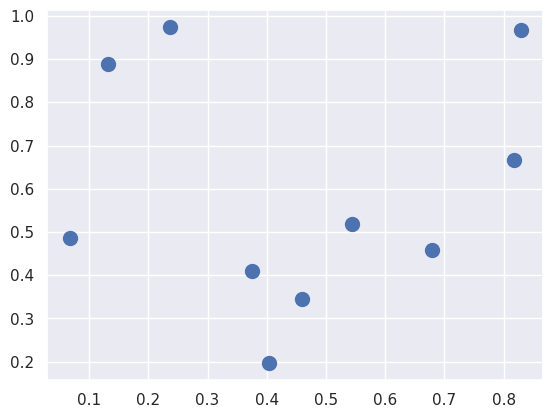

In [68]:
# 결합

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 분석 결과를 시각화
X = np.random.rand(10, 2)
plt.scatter(X[:, 0], X[:, 1], s=100);  # 산포도 / s는 size

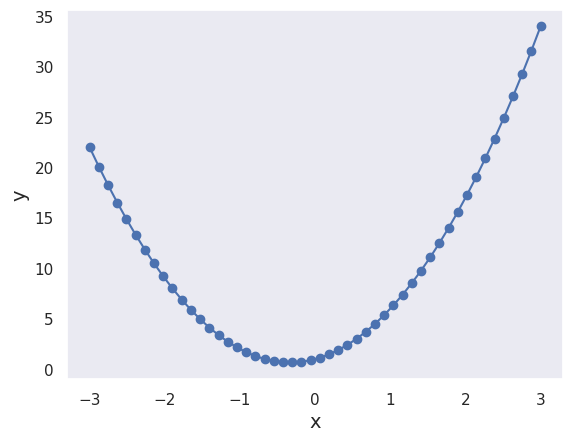

In [73]:
def my_func(x):
  return 3*x**2 + 2*x + 1  # 2차 방정식 : 변곡점이 한개 (3차 방정식은 변곡점 2개) (1차 방정식은 변곡점 X)

x = np.linspace(-3, 3)  # 개수 default 50개.
y = my_func(x)

plt.plot(x, y)  # 선
plt.plot(x, y, 'bo')  # color, marker(마커)
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()  # 격자선
plt.show()  # 그래프를 보여줌

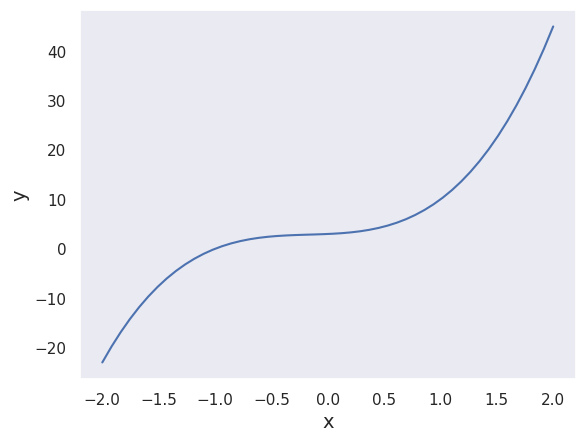

In [75]:
def my_func(x):
  return 4*x**3 + 2*x**2 + x + 3  # 3차 방정식

x = np.linspace(-2, 2)  # 정의역
y = my_func(x)  # 치역

plt.plot(x, y)
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()
plt.show()

In [77]:
# 최소제곱법 : 차의 제곱의 합이 최소가 되는 기울기의 절편
# y = ax + b (절편)
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T  # vertical : 수직으로 / horizontal : 수평으로
# T : transpose 전치
# [0, 1, 2, 3]
# [1, 1, 1, 1]
m, c = np.linalg.lstsq(A, y, rcond=None)[0]  # least square : 최소제곱법
m, c

(0.9999999999999999, -0.9499999999999997)

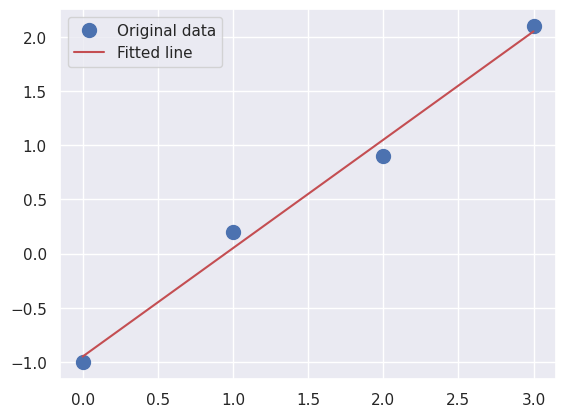

In [82]:
plt.plot(x, y, 'o', label='Original data', markersize=10)  # 실제 데이터
plt.plot(x, m*x + c, 'r', label = 'Fitted line')  # 예측된 데이터를 출력
plt.legend()
plt.show()

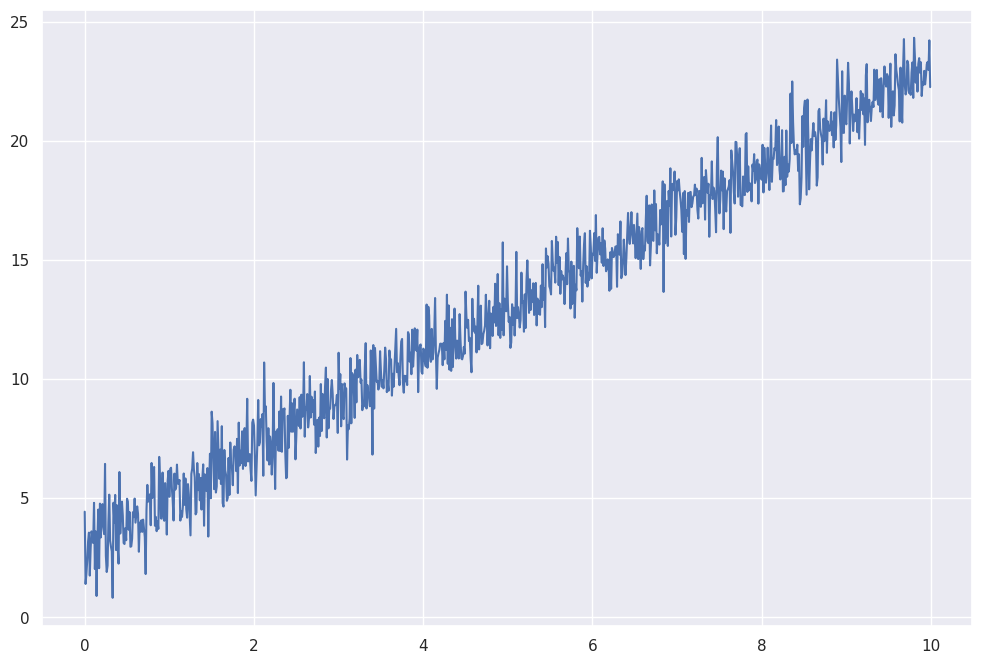

In [83]:
t = np.arange(0, 10, 0.01)  # 0부터 10까지, 증가값은 0.01
y = 2*t + 3

y_noise = y + np.random.randn(len(y))

plt.figure(figsize=(12, 8))
plt.plot(t, y_noise)
plt.show()

In [85]:
fp1 = np.polyfit(t, y_noise, 1)  # 다차원(1차원)으로 fitting
fp1
# 기울기와 절편

array([1.99449552, 3.04360235])

In [87]:
f1 = np.poly1d(fp1)  # 방정식으로 바꾸어줌

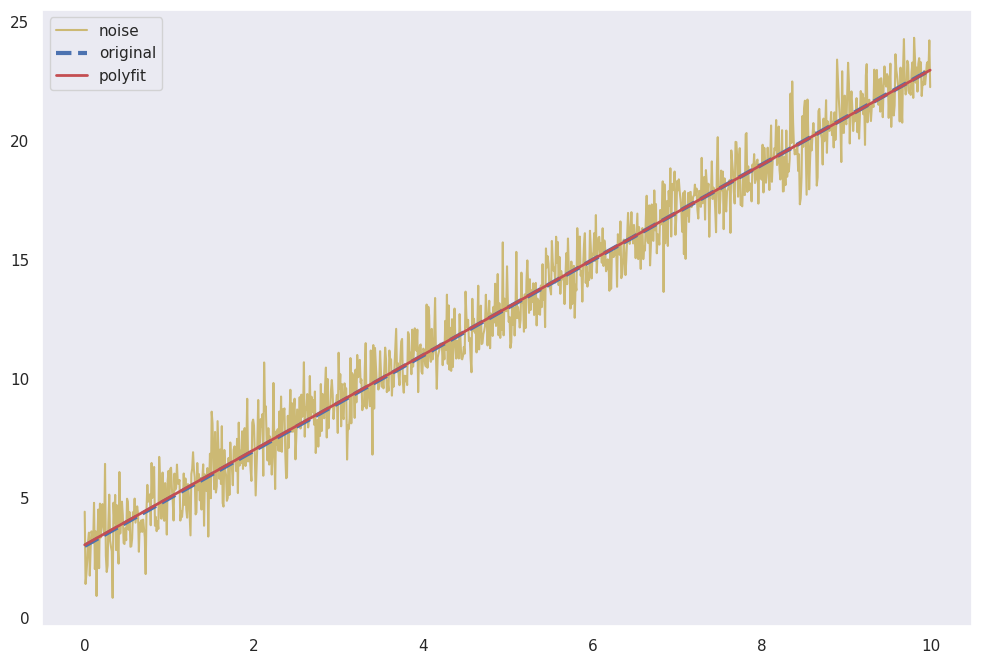

In [88]:
plt.figure(figsize=(12, 8))
plt.plot(t, y_noise, label='noise', color='y')  # 노이즈 
plt.plot(t, y, ls='dashed', lw=3, color='b', label='original')  # 원래의 선
plt.plot(t, f1(t), lw=2, color='r', label='polyfit')  # 예측된 선
plt.grid()
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

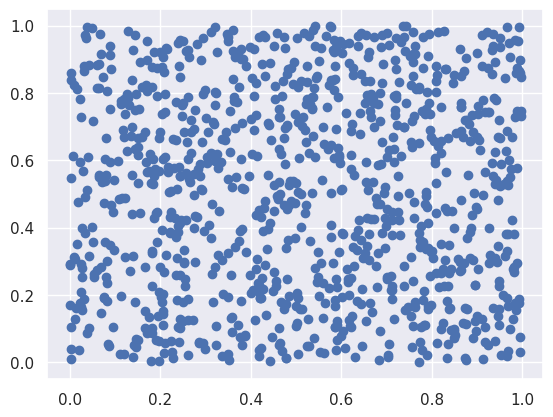

In [90]:
n = 1000
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y)
plt.grid
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

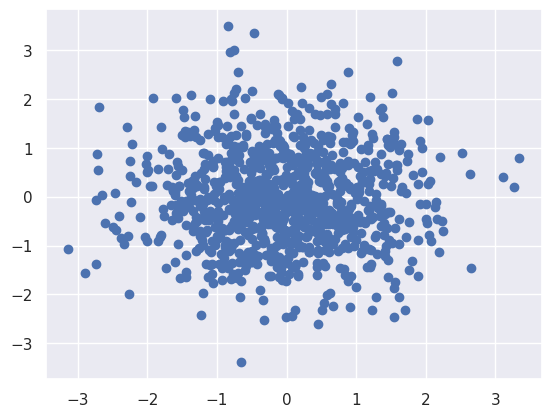

In [92]:
x = np.random.randn(n)
y = np.random.randn(n)

plt.scatter(x, y)
plt.grid
plt.show

In [ ]:
# 전체인지 행방향인지 열방향인지, 계산 방법에 차이가 있음


In [95]:
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # 3x3 행렬
print("원본: \n", arr)
print("누적합(행): \n", arr.cumsum(0))   # cumulative / 행방향 열로 계산
print("누적곱(열): \n", arr.cumprod(1))  # product / 열방향 행으로 계산

arr = np.random.randn(5, 4)
print(arr)
print("배열의 평균 = ", arr.mean())  # 전체 배열의 평균

np.mean(arr)
print("배열의 합계 =", arr.sum())    # 전체 
print("열방향으로의 합게 =", arr.mean(axis=1))  # 행
print("행방향으로의 합계 =", arr.sum(0))  # 열 

원본: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
누적합(행): 
 [[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
누적곱(열): 
 [[  1   2   6]
 [  4  20 120]
 [  7  56 504]]
[[-2.37475839 -0.25135685 -1.44259511 -1.26104404]
 [ 0.02082877 -0.08251265  0.88736864  0.04654616]
 [ 0.12996466  0.22573281  0.22478331  2.19507174]
 [-0.58305727 -1.28053054  0.27044306  0.33585155]
 [-1.55532948 -2.65755638  0.57905455 -1.40974111]]
배열의 평균 =  -0.3991418295142316
배열의 합계 = -7.982836590284632
열방향으로의 합게 = [-1.3324386   0.21805773  0.69388813 -0.3143233  -1.26089311]
행방향으로의 합계 = [-4.3623517  -4.04622362  0.51905445 -0.09331571]


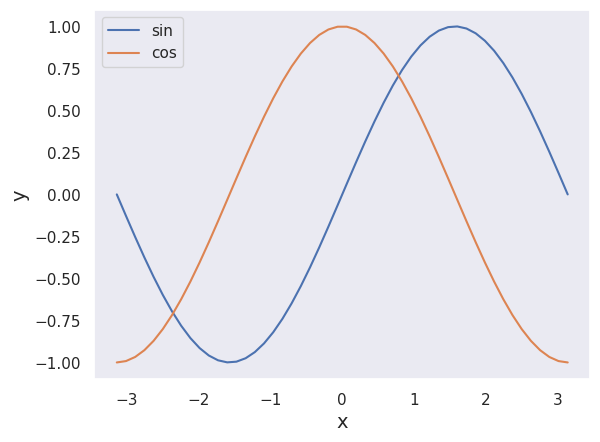

In [96]:
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi)  # -3.14부터 3.14까지 50개(디폴트) 추출
y_sin = np.sin(x)  # 0부터 시작
y_cos = np.cos(x)  # 1부터 시작

plt.plot(x, y_sin, label='sin')
plt.plot(x, y_cos, label='cos')
plt.legend()  # legend() : 그래프에 범례를 표시하는 함수

plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()
plt.show()

In [97]:
# 문제
# 대각선이 8이고, 그 사이각이 45도라면, 밑변의 길이와 높이를 구하기
# 삼각함수는 반지름이 1인 경우에, 길이의 비를 구함
# 컴퓨터에서는 각도가 아닌, 라디안으로 입력해야 한다.
# cos(사이각) : 길이의 비,  밑변 / 대각선 
radian = np.math.radians(45)
length_rate = np.math.cos(np.math.pi / 4)
length_rate = np.math.cos(radian)
lower_length = length_rate * 8
length_rate = np.math.sin(np.math.pi / 4)
height = length_rate * 8
print("밑변: ", lower_length, " 높이: ", height)

# sin(사이각)
# tan(사이각)

밑변:  5.656854249492381  높이:  5.65685424949238


In [98]:
# 문제
# 밑변이 5이고, 그 사이각이 60도일 때 대각선의 길이 구하기 
length_rate = np.math.cos(np.math.radians(60))  
# 길이의 비 = 밑변 / 대각선
length = 5 / length_rate
print("대각선의 길이: ", length)

대각선의 길이:  9.999999999999998


In [105]:
# 문제
# 입력되는 두 변의 길이(밑변과 높이)를 이용하여 사이각을 구하는 함수 만들기
num1 = float(input("밑변: "))
num2 = float(input("높이: "))

# 각도로부터 길이의 비는 삼각함수 (sin, cos, tan)
# 길이의 비로부터 각도를 구해주는 함수 (asin, acos, atan) => 결과는 라디안(radian)
np.math.degrees(np.math.atan(num2 / num1))

def angle(base, height):
  return np.math.degrees(np.math.atan(height / base))

print("사이각은: ", angle(num1, num2))


밑변: 3
높이: 1
사이각은:  18.43494882292201


In [107]:
# 선형대수
vec1 = np.arange(5)
vec2 = np.arange(1, 6)
print(np.sum(vec1 * vec2))
print(vec1)
print(vec2)

40
[0 1 2 3 4]
[1 2 3 4 5]


In [108]:
vec1.dot(vec2)  # 내적

40

In [110]:
# 벡터의 크기 : 각 요소의 제곱을 구하여, 다 더한 다음 sqrt를 구한다. (피타고라스 정리)
np.sqrt(np.sum(vec1 ** 2))  # 5.477
np.linalg.norm(vec1)

5.477225575051661

A@B = |A| |B| cos theta 
A@B / (|A| |B|)

In [114]:
costheta = vec1@vec2 / (np.linalg.norm(vec1) * np.linalg.norm(vec2))  # 벡터1과 벡터2의 크기 / 0.9847
np.math.degrees(np.arccos(costheta))  # 라디안으로 변환

10.024987862075765

In [115]:
# 함수가 리턴하는 값의 의미? -> cos theta 값 : cos 유사도
def cos_sim(vec_1, vec_2):
  return np.dot(vec_1, vec_2) / (np.linalg.norm(vec_1) * np.linalg.norm(vec_2))

a = np.array([2, 2, 2, 2])
b = np.array([1, 1, 1, 1])
c = np.array([-1, -1, -1, -1])

print(cos_sim(a, b))  # 1
print(cos_sim(a, c))  # -1
# 두 벡터간 상관계수는 같다 : 두 벡터에는 상관이 있다.

1.0
-1.0


In [125]:
arr = np.arange(32).reshape(8,4)
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [126]:
arr.T  # 전치행렬 4x8

array([[ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 1,  5,  9, 13, 17, 21, 25, 29],
       [ 2,  6, 10, 14, 18, 22, 26, 30],
       [ 3,  7, 11, 15, 19, 23, 27, 31]])

In [127]:
arr@arr.T  # 8x4 4x8  # 내적연산 : 요소의 특징을 잡아내는 도구 -> 크기가 고려된 사이각을 구하는 것

array([[  14,   38,   62,   86,  110,  134,  158,  182],
       [  38,  126,  214,  302,  390,  478,  566,  654],
       [  62,  214,  366,  518,  670,  822,  974, 1126],
       [  86,  302,  518,  734,  950, 1166, 1382, 1598],
       [ 110,  390,  670,  950, 1230, 1510, 1790, 2070],
       [ 134,  478,  822, 1166, 1510, 1854, 2198, 2542],
       [ 158,  566,  974, 1382, 1790, 2198, 2606, 3014],
       [ 182,  654, 1126, 1598, 2070, 2542, 3014, 3486]])

# 행렬의 거듭제곱은 정방행렬이면서 대칭행렬을 만드다.
# 상관행렬, 상관계수행렬은 정방행렬이면서 대칭행렬이다.
# => 고유값분해 => 고유값 + 고유벡터
# 고유벡터 정직교하고 고유값은 그 축방향으로의 크기값이다 (주선분 분석 : 데이터 노이즈가 사라짐, 정직교하는 축에 데이터를 재표현하여 다중공선성 제거) => 모델을 적용하면 accuracy가 높은 모델을 만들 수 있다.

In [118]:
np.matmul(arr, arr.T)

array([[ 9.37397039, -1.3675336 , -3.45772759,  0.89282684,  5.3039311 ],
       [-1.3675336 ,  0.79683182,  0.28571901,  0.34913089,  0.63510324],
       [-3.45772759,  0.28571901,  4.93671359,  0.43317473, -3.76635659],
       [ 0.89282684,  0.34913089,  0.43317473,  2.16564996,  3.99306582],
       [ 5.3039311 ,  0.63510324, -3.76635659,  3.99306582, 11.80432987]])

In [124]:
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])  # 4x3 행렬
print(x, '\n')
v = np.array([1, 0, 1])

print("타일 출력")
vv = np.tile(v, (4, 1))  # 수동으로 브로드캐스팅 (v를 4번 만들고 1번 반복) (deep learning => 군집 분석) (군집분석 사용 시 타일이 필요)
print(vv, '\n')

y = x + vv
print(y, '\n')

x + v
x + 3  # 모든 데이터에 3 더하기

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 

타일 출력
[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]] 

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]] 



array([[ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

In [134]:
                         # [0] [1] [2]
arr = np.arange(24).reshape((2, 3, 4))  # 0부터 23까지, 2차원 3x4 행렬
print(arr)

print(arr.transpose((1, 0, 2)))  # 3 x 2 x 4 행렬로 전치하라는 의미
print(arr.transpose((0, 2, 1)))  # 2 x 4 x 3 행렬로 전치하라는 의미

print("축 바꾸기")
print(arr.swapaxes(1, 2))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[[[ 0  1  2  3]
  [12 13 14 15]]

 [[ 4  5  6  7]
  [16 17 18 19]]

 [[ 8  9 10 11]
  [20 21 22 23]]]
[[[ 0  4  8]
  [ 1  5  9]
  [ 2  6 10]
  [ 3  7 11]]

 [[12 16 20]
  [13 17 21]
  [14 18 22]
  [15 19 23]]]
축 바꾸기
[[[ 0  4  8]
  [ 1  5  9]
  [ 2  6 10]
  [ 3  7 11]]

 [[12 16 20]
  [13 17 21]
  [14 18 22]
  [15 19 23]]]


In [ ]:
# 역행렬을 통한 방정식의 해
# x + y = 2  (z=0)
# y + z = 2  (x=0)
# x + y + z = 3
# [[1, 1, 0],     [x,y,z] = [[2],
#  [0, 1, 1],                [2],
#  [1, 1, 1]]                [2]]
# 행렬의 나눗셈은 없음 -> 역행렬을 만들어서 곱해준다.

In [135]:
A = np.array([[1, 1, 0], [0, 1, 1], [1, 1, 1]])
Ainv = np.linalg.inv(A)  # 역행렬 계산
b = np.array([[2], [2], [3]])
b
x = Ainv @ b
x

array([[1.],
       [1.],
       [1.]])

In [139]:
# 문제
# 2x + y - 2x = -3
# 3x + z = 5
# x + y - z = -2

A = np.array([[2, 1, -2], [3, 0, 1], [1, 1, -1]])
b = np.array([[-3, 5, -2]]).T
x = np.linalg.solve(A, b)
x

array([[ 1.],
       [-1.],
       [ 2.]])

In [140]:
np.linalg.inv(A)@b

array([[ 1.],
       [-1.],
       [ 2.]])

In [141]:
np.matmul(np.linalg.inv(A), b)

array([[ 1.],
       [-1.],
       [ 2.]])